In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/amazon-fine-food-reviews/database.sqlite
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv


In [2]:
import pandas as pd
reviews = pd.read_csv("../input/amazon-fine-food-reviews/Reviews.csv")

In [3]:
reviews = reviews[reviews['Score'] != 3]

In [4]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
# replacing score 1,2 as positive and 3,4 as negative
actual_score = reviews['Score']
positive_negative = reviews['Score'].apply(lambda x: 'positive' if x == 1 or x == 2 else 'negative')

In [6]:
reviews['Score'] = positive_negative

In [7]:
reviews['Time'] = pd.to_datetime(reviews['Time'],unit='s')

In [8]:
sorted_reviews = reviews.sort_values(by='ProductId')

In [9]:
final_review = sorted_reviews.drop_duplicates(subset = {'UserId','ProfileName','Time','Text'},keep = 'first')

In [10]:
final_review = final_review[final_review['HelpfulnessNumerator'] < final_review['HelpfulnessDenominator']] # considering reviews that have actually helped people

In [11]:
final_review_positive = final_review[final_review['Score'] == 'positive']

In [12]:
final_review_positive

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150525,150526,0006641040,A3E9QZFE9KXH8J,R. Mitchell,11,18,positive,2005-10-17,awesome book poor size,This is one of the best children's books ever ...
171179,171180,7310172001,A2WDF9UM0M1VAD,susan m. kaitz,3,6,positive,2011-10-06,Review of Freeze Dried Liver Treats For Dogs,I received all containers previously opened - ...
171185,171186,7310172001,A12OC9ZA779927,"Nancy Watts ""Nan Watts""",1,22,positive,2005-12-10,no shipping charges in December if over $50 on...,Same price as Dr. Foster & Smith.
171181,171182,7310172001,ANW9G620WDPVE,"Kay M ""kay""",2,7,positive,2009-03-18,"great treat, but too expensive","okay, it's freeze-dried liver cube-lets. my c..."
171182,171183,7310172001,AE9ZBY7WW3LIQ,W. K. Ota,5,13,positive,2008-08-22,Why sbould I get crums?,I selected this company over the other even th...
...,...,...,...,...,...,...,...,...,...,...
260703,260704,B0099HD3YA,A1ZMF11YKBEE2T,C. Caunt,262,263,positive,2011-04-06,No no no!,I purchased the capsule via amazon as I do mos...
260704,260705,B0099HD3YA,A1K9I34SS9F2OS,jeremiahpj,319,323,positive,2011-01-13,Way too expensive. Much cheaper through Nespre...,These pods cost way more than ordering through...
526276,526277,B009CGGYHQ,ARQKQV5IS0585,kidrambler,1,2,positive,2011-05-20,Garbage!!!!,They deleted my previous review so I am writin...
463875,463876,B009HX6ZC8,A3PC9F502706GT,"L. Buczkowski ""Lissy""",1,3,positive,2012-10-02,"Mediocre Candy, But a step in the right direct...",I did a little research about these candies be...


In [13]:
final_review_negative = final_review[final_review['Score'] == 'negative']

In [14]:
final_review_negative

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150508,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,negative,2002-04-10,A great way to learn the months,This is a book of poetry about the months of t...
150524,150525,0006641040,A2QID6VCFTY51R,Rick,1,2,negative,2002-07-01,"In December it will be, my snowman's anniversa...","My daughter loves all the ""Really Rosie"" books..."
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,negative,2005-02-15,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...
150492,150493,0006641040,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",71,72,negative,2004-09-29,Read it once. Read it twice. Reading Chicken S...,"These days, when a person says, ""chicken soup""..."
171227,171228,7310172001,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",5,7,negative,2009-01-31,NO waste at all--- all dogs love liver treats-...,Freeze dried liver has a hypnotic effect on do...
...,...,...,...,...,...,...,...,...,...,...
260734,260735,B0099HD3YA,ADV19KMGW7DUS,blender,0,15,negative,2012-04-17,perfect coffe,this are perfect capsules mix for the daily us...
260733,260734,B0099HD3YA,A1RH7WA3YFDQ5H,Denise2012,0,11,negative,2012-04-27,GREAT SELECTION,GREAT COFFEE VARIETY FOR ANYONE WITH NESPRESSO...
8929,8930,B009AVDFCK,A3AHZYRP1R90YQ,"K. Dora ""KDD""",3,6,negative,2008-12-28,Good tasting and great gift.,After purchasing these steaks for myself. I fo...
8927,8928,B009AVDFCK,A2PQT2JE8ZUR8W,Adam,2,3,negative,2010-04-05,"Great price, great gift",The 12 pack is a great gift idea because Omaha...


In [15]:
final_review

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150508,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,negative,2002-04-10,A great way to learn the months,This is a book of poetry about the months of t...
150524,150525,0006641040,A2QID6VCFTY51R,Rick,1,2,negative,2002-07-01,"In December it will be, my snowman's anniversa...","My daughter loves all the ""Really Rosie"" books..."
150525,150526,0006641040,A3E9QZFE9KXH8J,R. Mitchell,11,18,positive,2005-10-17,awesome book poor size,This is one of the best children's books ever ...
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,negative,2005-02-15,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...
150492,150493,0006641040,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",71,72,negative,2004-09-29,Read it once. Read it twice. Reading Chicken S...,"These days, when a person says, ""chicken soup""..."
...,...,...,...,...,...,...,...,...,...,...
8927,8928,B009AVDFCK,A2PQT2JE8ZUR8W,Adam,2,3,negative,2010-04-05,"Great price, great gift",The 12 pack is a great gift idea because Omaha...
526276,526277,B009CGGYHQ,ARQKQV5IS0585,kidrambler,1,2,positive,2011-05-20,Garbage!!!!,They deleted my previous review so I am writin...
463875,463876,B009HX6ZC8,A3PC9F502706GT,"L. Buczkowski ""Lissy""",1,3,positive,2012-10-02,"Mediocre Candy, But a step in the right direct...",I did a little research about these candies be...
68917,68918,B009IAUEOU,AZFYU1OVBPZ3,"Readaholic ""Cindy""",1,3,positive,2012-10-04,Don't bother!!,I was very unimpressed with these almonds. Th...


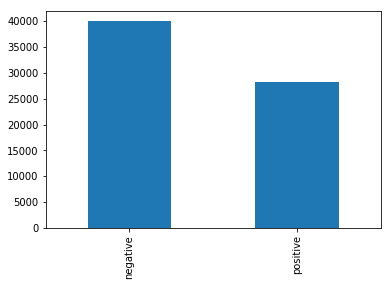

In [16]:
final_review['Score'].value_counts().plot(kind = 'bar')

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
st = stopwords.words('english')

In [18]:
text = final_review['Text'].apply(lambda x: re.sub('<.*>',' ',x)) #removing html tags
text = text.apply(lambda x : re.sub(r'[?|!|\'|"|#]',r'',x))  #removing punctuations
text = text.apply(lambda x : re.sub(r'[.|,|)|(|\\|/]',r' ',x)) # if you find this punctuations substitute with space
text = text.apply(lambda x : ' '.join([word for word in x.split() if word.isalpha() and len(word) > 2])) # discarding all numerical words and words whose length is 
#less than 2

text = text.apply(lambda x : ' '.join([word for word in x.split() if word.lower() not in st])) # removing stopwords
snow_ball_stemmer = SnowballStemmer('english')
porter_stemmer = PorterStemmer()
text = text.apply(lambda x : ' '.join([snow_ball_stemmer.stem(word.lower()) for word in x.split()]))

In [19]:
text

150508    book poetri month year goe month cute littl po...
150524    daughter love realli rosi book introduc realli...
150525    one best children book ever written mini versi...
150528    june great book teach children month year repe...
150492    day person say chicken soup theyr probabl go f...
                                ...                        
8927      pack great gift idea omaha steak packag two bo...
526276    delet previous review write anoth one lemon ve...
463875    littl research candi invit tri free websit you...
68917     unimpress almond clovey musti tast expect swee...
71231     recent discov mix trip florida delight order a...
Name: Text, Length: 68271, dtype: object

In [20]:
positive_and_negative_words = pd.concat([final_review['Score'],text],axis = 1)
positive_words = positive_and_negative_words[positive_and_negative_words['Score'] == 'positive']
all_positive_words = [word for sent in positive_words['Text'] for word in sent.split()]


negative_words = positive_and_negative_words[positive_and_negative_words['Score'] == 'negative']
all_negative_words_array = [word for sent in negative_words['Text'] for word in sent.split()]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
count_vec_trigrams = CountVectorizer(ngram_range = (1,3))
max_df = [0.4,0.5,0.6,0.7]
min_df = [0.01,0.02,0.1,0.2,0.3,0.4]
bag_of_words_count_vec = count_vec.fit_transform(text)

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vec = TfidfTransformer()
bag_of_words_tfidf = tfidf_vec.fit_transform(bag_of_words_count_vec)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
standard_scaler = StandardScaler(with_mean = False)
bag_of_words_standard_scaler = standard_scaler.fit_transform(bag_of_words_count_vec)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(bag_of_words_standard_scaler,final_review['Score'],test_size = 0.2)

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
mylist = np.arange(0.00001,0.001,0.00005)
#mylist = np.arange(0.01,0.9,0.09)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
X_train,X_test,y_train,y_test = train_test_split(bag_of_words_standard_scaler,final_review['Score'],test_size = 0.2)
array = []
for i in mylist:
    naive_bays = MultinomialNB(alpha = i)
    clf = naive_bays.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc_score = accuracy_score(pred,y_test)
    #roc_auc_score = roc_auc_score(pred,y_test)
    array.append((i,acc_score))




In [27]:
params = pd.DataFrame(array)
params[params[1] == params[1].max()]

,0,1
3,0.00016,0.715196
4,0.00021,0.715196
5,0.00026,0.715196
6,0.00031,0.715196
7,0.00036,0.715196
8,0.00041,0.715196
9,0.00046,0.715196
10,0.00051,0.715196
11,0.00056,0.715196
12,0.00061,0.715196


In [28]:
nb = MultinomialNB(alpha = 0.00001)
model = nb.fit(X_train,y_train)
pred = model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

    negative       0.68      0.81      0.74      6771
    positive       0.77      0.63      0.69      6884

    accuracy                           0.71     13655
   macro avg       0.72      0.72      0.71     13655
weighted avg       0.72      0.71      0.71     13655



In [30]:
bag_of_word_features = count_vec.get_feature_names()

In [31]:
model.class_count_

array([31995., 22621.])

In [32]:
model.feature_log_prob_

array([[-10.77404468, -10.77404468, -10.77404468, ..., -27.85259769,
        -27.85259769, -10.77404468],
       [-27.51120196, -27.51120196, -27.51120196, ..., -27.51120196,
        -27.51120196, -27.51120196]])

In [33]:
df = pd.DataFrame(model.feature_log_prob_,columns = count_vec.get_feature_names()).T
df

,0,1
aaa,-10.774045,-27.511202
aaaaaaaaagghh,-10.774045,-27.511202
aaaaah,-10.774045,-27.511202
aaaah,-10.774045,-27.511202
aaah,-10.774045,-27.511202
...,...,...
zzzzzzz,-11.120611,-10.779215
zzzzzzzz,-10.774045,-27.511202
zzzzzzzzzz,-27.852598,-27.511202
zzzzzzzzzzz,-27.852598,-27.511202


In [34]:
positive = df[0].sort_values(ascending = False)[:10]

In [35]:
#the top 20 words that are positive are[:10]
negative = df[1].sort_values(ascending = False)[:10]

In [36]:
negative # words that are negative

tast         -6.442493
product      -6.484263
like         -6.487173
would        -6.628596
one          -6.698705
tri          -6.728853
buy          -6.729148
disappoint   -6.777637
dont         -6.833561
even         -6.851155
Name: 1, dtype: float64

In [37]:
positive # words that are positive

great    -6.516262
good     -6.577065
love     -6.604379
like     -6.660872
tast     -6.741622
use      -6.771377
one      -6.816186
make     -6.841067
flavor   -6.851606
tri      -6.859513
Name: 0, dtype: float64

In [38]:
y_test

406580    negative
89973     negative
554753    negative
110820    negative
360012    negative
            ...   
88598     positive
302266    negative
478879    positive
83556     negative
156304    negative
Name: Score, Length: 13655, dtype: object

In [39]:
mylist = np.arange(0.00001,0.001,0.00005)
#mylist = np.arange(0.01,0.9,0.09)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
X_train,X_test,y_train,y_test = train_test_split(bag_of_words_tfidf,final_review['Score'],test_size = 0.2)
array = []
for i in mylist:
    naive_bays = MultinomialNB(alpha = i)
    clf = naive_bays.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc_score = accuracy_score(pred,y_test)
    #roc_auc_score = roc_auc_score(pred,y_test)
    array.append((i,acc_score))




In [40]:
params = pd.DataFrame(array)

In [41]:
params[params[1] == params[1].max()]

,0,1
19,0.00096,0.789015


In [42]:
nb = MultinomialNB(alpha = 0.00096)
model = nb.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

    negative       0.88      0.79      0.83      8869
    positive       0.67      0.79      0.72      4786

    accuracy                           0.79     13655
   macro avg       0.77      0.79      0.78     13655
weighted avg       0.80      0.79      0.79     13655



In [43]:
model.class_count_ # how many classes of each terms were used during the classification

array([32061., 22555.])

In [44]:
model.feature_log_prob_

array([[-13.64242323, -18.81747424, -13.1102574 , ..., -18.81747424,
        -13.02744886, -12.83350987],
       [-18.48708094, -18.48708094, -18.48708094, ..., -18.48708094,
        -18.48708094, -18.48708094]])

In [45]:
df = pd.DataFrame(model.feature_log_prob_,columns = count_vec.get_feature_names()).T
df

,0,1
aaa,-13.642423,-18.487081
aaaaaaaaagghh,-18.817474,-18.487081
aaaaah,-13.110257,-18.487081
aaaah,-18.817474,-18.487081
aaah,-13.825598,-18.487081
...,...,...
zzzzzzz,-12.954401,-12.443680
zzzzzzzz,-18.817474,-18.487081
zzzzzzzzzz,-18.817474,-18.487081
zzzzzzzzzzz,-13.027449,-18.487081


In [46]:
df_positive = df[0]
df_negative = df[1]

In [47]:
df_positive.sort_values(ascending = False)[0:10] # the positive words are

great     -5.013540
good      -5.070142
love      -5.128034
tast      -5.149826
like      -5.160443
coffe     -5.193113
product   -5.244479
flavor    -5.301974
use       -5.317603
tea       -5.322444
Name: 0, dtype: float64

In [48]:
df_negative.sort_values(ascending = False)[0:10] # the negative words are

tast      -4.863341
product   -4.960908
like      -4.994465
would     -5.347371
one       -5.349352
tri       -5.407667
coffe     -5.408848
buy       -5.423671
flavor    -5.428354
order     -5.450177
Name: 1, dtype: float64

In [49]:
count_vec_bigrams = CountVectorizer(ngram_range = (1,2))
bag_of_words_count_vec_bigrams = count_vec_bigrams.fit_transform(text)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vec = TfidfTransformer()
bag_of_words_tfidf_bigrams = tfidf_vec.fit_transform(bag_of_words_count_vec_bigrams)

In [50]:
mylist = np.arange(0.00001,0.001,0.00005)
#mylist = np.arange(0.01,0.9,0.09)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
X_train,X_test,y_train,y_test = train_test_split(bag_of_words_tfidf_bigrams,final_review['Score'],test_size = 0.2)
array = []
for i in mylist:
    naive_bays = MultinomialNB(alpha = i)
    clf = naive_bays.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc_score = accuracy_score(pred,y_test)
    #roc_auc_score = roc_auc_score(pred,y_test)
    array.append((i,acc_score))




In [51]:
params = pd.DataFrame(array)
params[params[1] == params[1].max()]

,0,1
19,0.00096,0.795313


In [52]:
nb = MultinomialNB(alpha = 0.00096)
model = nb.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

    negative       0.83      0.82      0.83      8096
    positive       0.74      0.76      0.75      5559

    accuracy                           0.80     13655
   macro avg       0.79      0.79      0.79     13655
weighted avg       0.80      0.80      0.80     13655



In [53]:
df = pd.DataFrame(model.feature_log_prob_,columns = count_vec_bigrams.get_feature_names()).T

In [54]:
df.reset_index(inplace = True)

In [55]:
df['index'] == len(df['index'].str.split())

0         False
1         False
2         False
3         False
4         False
          ...  
882391    False
882392    False
882393    False
882394    False
882395    False
Name: index, Length: 882396, dtype: bool

In [56]:
df.reset_index(inplace = True)

In [57]:
unigrams = df[df['index'].str.split(expand = True)[1].apply(lambda x : True if pd.isnull(x) else False)]

In [58]:
bigrams = df[df['index'].str.split(expand = True)[1].apply(lambda x : False if pd.isnull(x) else True)]

In [59]:
unigrams = unigrams.set_index('index')

In [60]:
df_positive = unigrams[0]
df_negative = unigrams[1]

In [61]:
df_positive.sort_values(ascending = False)[:10]

index
great     -6.119385
good      -6.169813
love      -6.229387
like      -6.235533
tast      -6.236571
coffe     -6.295579
product   -6.347756
tea       -6.374395
flavor    -6.387073
use       -6.399547
Name: 0, dtype: float64

In [62]:
df_negative.sort_values(ascending = False)[:10]

index
tast      -5.972073
product   -6.067395
like      -6.086945
would     -6.446168
one       -6.458895
coffe     -6.480976
tri       -6.506277
flavor    -6.520546
buy       -6.530180
order     -6.548975
Name: 1, dtype: float64

In [63]:
bigrams = bigrams.set_index('index')

In [64]:
df_positive = bigrams[0]
df_negative = bigrams[1]

In [65]:
df_positive.sort_values(ascending = False)[:10]

index
high recommend   -7.725376
tast great       -7.901881
tast like        -7.961859
groceri store    -8.032465
tast good        -8.039585
great product    -8.118190
great tast       -8.118561
green tea        -8.298434
peanut butter    -8.299823
realli like      -8.334024
Name: 0, dtype: float64

In [66]:
df_negative.sort_values(ascending = False)[:10]

index
tast like         -7.084677
wast money        -7.676618
dont know         -8.085609
tast good         -8.247498
groceri store     -8.275482
thought would     -8.353587
much better       -8.388698
look like         -8.423890
would recommend   -8.452372
never buy         -8.487142
Name: 1, dtype: float64